In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [33]:
file_path = 'C:/Users/JOE/Desktop/Task/NFLX.csv'  
data = pd.read_csv(file_path)
data = data[['Date','Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print(data.head())

               Close
Date                
2002-05-23  1.196429
2002-05-24  1.210000
2002-05-28  1.157143
2002-05-29  1.103571
2002-05-30  1.071429


In [34]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [35]:
# Prepare the training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]

x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [36]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

C:\Users\JOE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

4381/4381 ━━━━━━━━━━━━━━━━━━━━ 63s 14ms/step - loss: 7.6686e-04


In [38]:
# Prepare the test dataset
test_data = scaled_data[train_size - 60:]
x_test, y_test = [], data[train_size:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [39]:
# Predict the stock prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


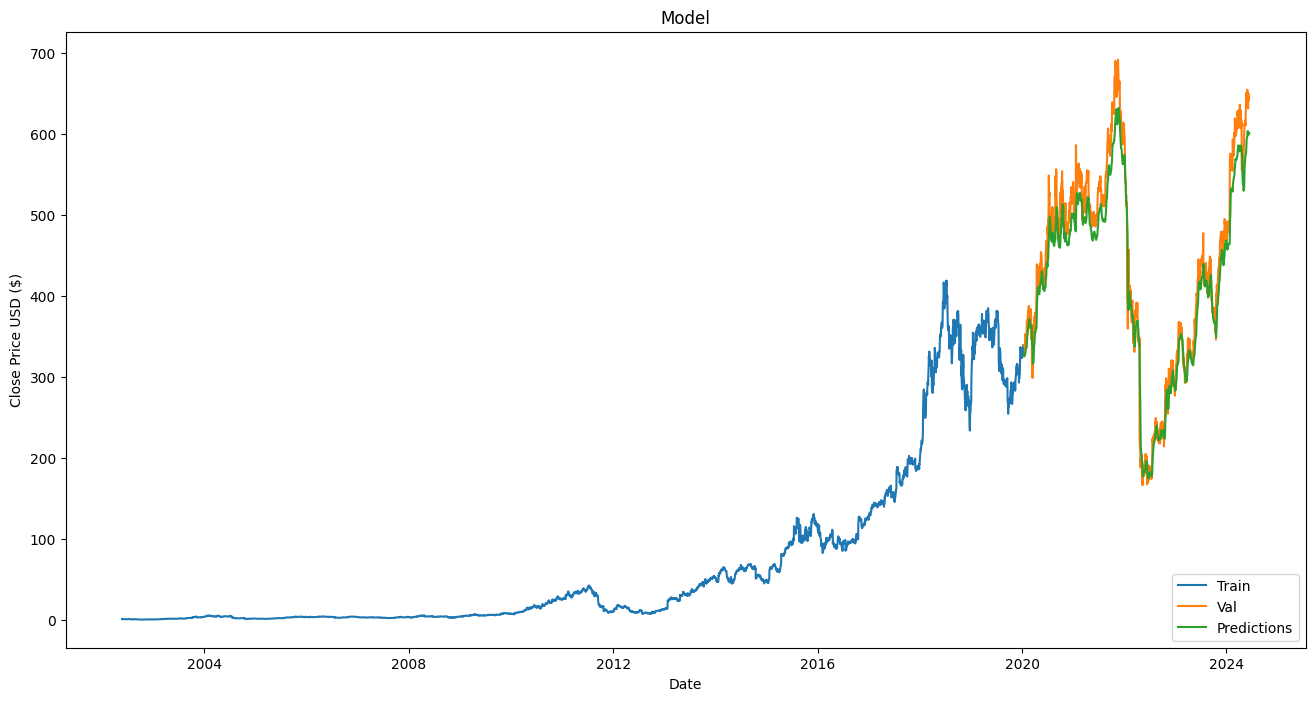

In [40]:
# Plot the results
train = data[:train_size]
valid = data[train_size:].copy()  
valid.loc[:, 'Predictions'] = predictions  

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()